## A Multi-Stage Automatic Network Analytics framework for IIoT systems

### load Data and Define Functions
#### Import Libraries

In [23]:
import pandas as pd
import numpy as np 
import matplotlib_inline
import matplotlib.pyplot as plt 
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# import river, an online learning library
from river import feature_selection
from river import stats
from river import imblearn
from river import preprocessing
from river import evaluate
from river import metrics

import warnings
warnings.filterwarnings('ignore')

In [24]:
#load the dataset
df = pd.read_csv("IoT Network Intrusion Dataset.csv")
df

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


In [25]:
df.isna().sum(axis=0).mul(-1).argsort()

Flow_ID      0
Src_IP      61
Src_Port    60
Dst_IP      59
Dst_Port    58
            ..
Idle_Max    25
Idle_Min    24
Label       23
Cat         31
Sub_Cat     85
Length: 86, dtype: int64

In [26]:
df.isnull().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
625778    0
625779    0
625780    0
625781    0
625782    0
Length: 625783, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

In [28]:
df.columns

Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_

In [29]:
col = ['Flow_ID', "Timestamp", "Dst_IP", "Src_IP"]
df = df.drop(col, axis=1) 


In [30]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['Cat', 'Sub_Cat', 'Label' ]

le = LabelEncoder()
df[object_cols] = df[object_cols].apply(le.fit_transform)

In [31]:
df = df.astype(np.float64)

In [32]:
X = df.drop("Label", axis=1)
y = df.Label

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.55, test_size = 0.45, shuffle=False,random_state = 0)


In [34]:
X_train.columns

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg',
       

In [35]:
df

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,10000.0,10101.0,17.0,75.0,1.0,1.0,982.0,1430.0,982.0,982.0,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,0.0,2.0,2.0
1,2179.0,554.0,6.0,5310.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0
2,52727.0,9020.0,6.0,141.0,0.0,3.0,0.0,2806.0,0.0,0.0,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,0.0,4.0,8.0
3,52964.0,9020.0,6.0,151.0,0.0,2.0,0.0,2776.0,0.0,0.0,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,0.0,2.0,4.0
4,36763.0,1900.0,17.0,153.0,2.0,1.0,886.0,420.0,452.0,434.0,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,56112.0,8043.0,17.0,277.0,1.0,1.0,18.0,18.0,18.0,18.0,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,0.0,2.0,5.0
625779,4570.0,554.0,6.0,1658.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,0.0,0.0,0.0
625780,52739.0,9020.0,6.0,77.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,0.0,4.0,8.0
625781,9020.0,49784.0,6.0,240.0,2.0,1.0,2776.0,1388.0,1388.0,1388.0,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,1.0,3.0,6.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 82 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src_Port           625783 non-null  float64
 1   Dst_Port           625783 non-null  float64
 2   Protocol           625783 non-null  float64
 3   Flow_Duration      625783 non-null  float64
 4   Tot_Fwd_Pkts       625783 non-null  float64
 5   Tot_Bwd_Pkts       625783 non-null  float64
 6   TotLen_Fwd_Pkts    625783 non-null  float64
 7   TotLen_Bwd_Pkts    625783 non-null  float64
 8   Fwd_Pkt_Len_Max    625783 non-null  float64
 9   Fwd_Pkt_Len_Min    625783 non-null  float64
 10  Fwd_Pkt_Len_Mean   625783 non-null  float64
 11  Fwd_Pkt_Len_Std    625783 non-null  float64
 12  Bwd_Pkt_Len_Max    625783 non-null  float64
 13  Bwd_Pkt_Len_Min    625783 non-null  float64
 14  Bwd_Pkt_Len_Mean   625783 non-null  float64
 15  Bwd_Pkt_Len_Std    625783 non-null  float64
 16  Fl

### Basic Adaptive Learning - Define Functions


In [37]:
# import online learning metrics and algorithms from river libary
from river import metrics
from river import stream
from river import tree,neighbors,naive_bayes,ensemble,linear_model
from river.drift import DDM, ADWIN,EDDM,HDDM_A,HDDM_W,KSWIN,PageHinkley

In [38]:
# Define a figure function that shows the real-time accuracy changes
import seaborn as sns
def acc_fig(t, m, name):
    plt.rcParams.update({'font.size': 15})
    plt.figure(1,figsize=(10,6)) 
    sns.set_style("darkgrid")
    plt.clf() 
    plt.plot(t,m,'-b',label='Avg Accuracy: %.2f%%'%(m[-1]))

    plt.legend(loc='best')
    plt.title(name+' IoT Network Intrusion Dataset', fontsize=15)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy (%)')

    plt.draw()

In [39]:
# Define a generic adaptive learning function
# The argument "model" means an online adaptive learning algorithm
def adaptive_learning(model, X_train, y_train, X_test, y_test):
    metric = metrics.Accuracy() # Use accuracy as the metric
    i = 0 # count the number of evaluated data points
    t = [] # record the number of evaluated data points
    m = [] # record the real-time accuracy
    yt = [] # record all the true labels of the test set
    yp = [] # record all the predicted labels of the test set

    # Learn the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        model.learn_one(xi1,yi1) 

    # Predict the test set
    for xi, yi in stream.iter_pandas(X_test, y_test):
        y_pred= model.predict_one(xi)  # Predict the test sample
        model.learn_one(xi,yi) # Learn the test sample
        metric = metric.update(yi, y_pred) # Update the real-time accuracy
        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)
        i = i+1
    print("Accuracy: "+str(round(accuracy_score(yt,yp),4)*100)+"%")
    print("Precision: "+str(round(precision_score(yt,yp),4)*100)+"%")
    print("Recall: "+str(round(recall_score(yt,yp),4)*100)+"%")
    print("F1-score: "+str(round(f1_score(yt,yp),4)*100)+"%")

    return t, m

In [40]:
%%time
# Use the Adaptive Random Forest (ARF) model with ADWIN drift detector as a baseline model
name1 = "ARF-ADWIN model"
model1 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = ADWIN()) # Define the model
t, m1 = adaptive_learning(model1, X_train, y_train, X_test, y_test) # Learn the model on the dataset

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-score: 100.0%
CPU times: total: 7min 12s
Wall time: 8min 3s


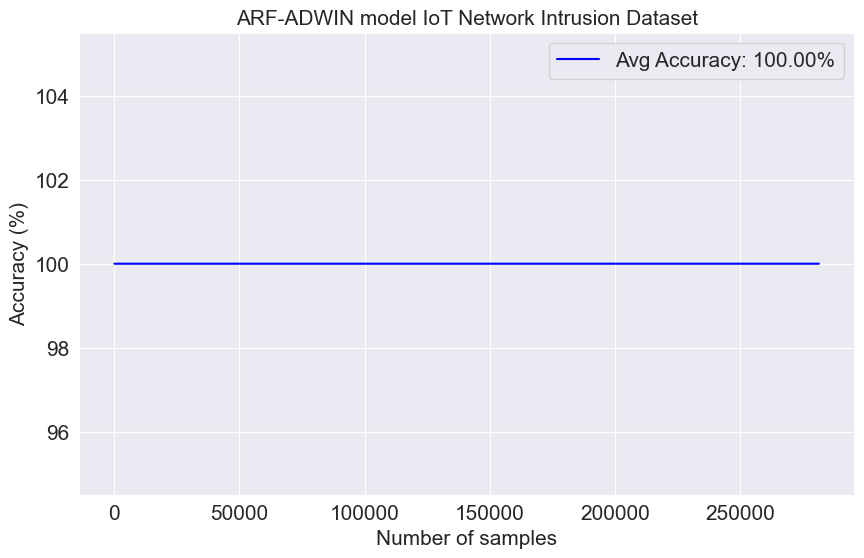

In [41]:
acc_fig(t, m1, name1) # Draw the figure of how the real-time accuracy changes with the number of samples


In [42]:
# eddm = EDDM()
# for i, x in stream.iter_pandas(df):
#     _ = eddm.update(x)
#     if eddm.warning_detected and print_warning:
#         print(f"Warning detected at index{i}")
#         # print_warning = False 
#     if eddm.drift_detected:
#         print(f"Changing detected at index {i}")
#         # print_warning = True    
        

### 2 Dynamic Data Pre-Processing

#### Here we focus on data balancing and data normalization
#### 1. Data balancing methods include Dynamic random under sampling(DRUS) and Dynamic Random Over-Sampling(DROS)

Accuracy: 92.5%
Precision: 46.02%
Recall: 99.83%
F1-score: 63.0%
CPU times: total: 2min 9s
Wall time: 2min 33s


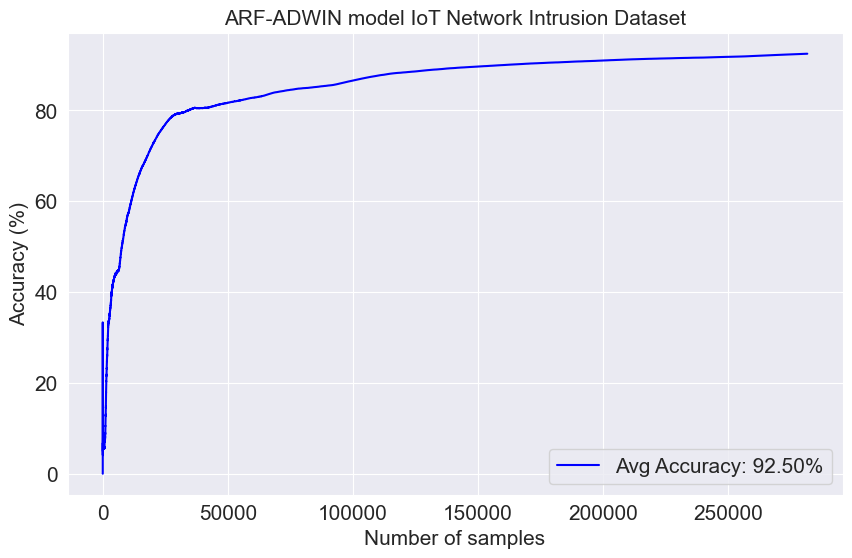

In [43]:
%%time
# Min-max normalization & random under-sampling
name1 = "ARF-ADWIN model"

model1 = imblearn.RandomUnderSampler( (
                                    preprocessing.MinMaxScaler() |
                                    ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = ADWIN())),
                                    desired_dist={0: 0.1, 1: 0.9}) 
                        # Ensure the ratio of the minority and the majority class samples is more than 1/9. 
                        # This rario can be changed according to specific situations.

t, m1 = adaptive_learning(model1, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m1, name1) # Draw the figure of how the real-time accuracy changes with the number of samples


Accuracy: 96.56%
Precision: 65.36999999999999%
Recall: 98.37%
F1-score: 78.53999999999999%
CPU times: total: 2min 42s
Wall time: 3min 15s


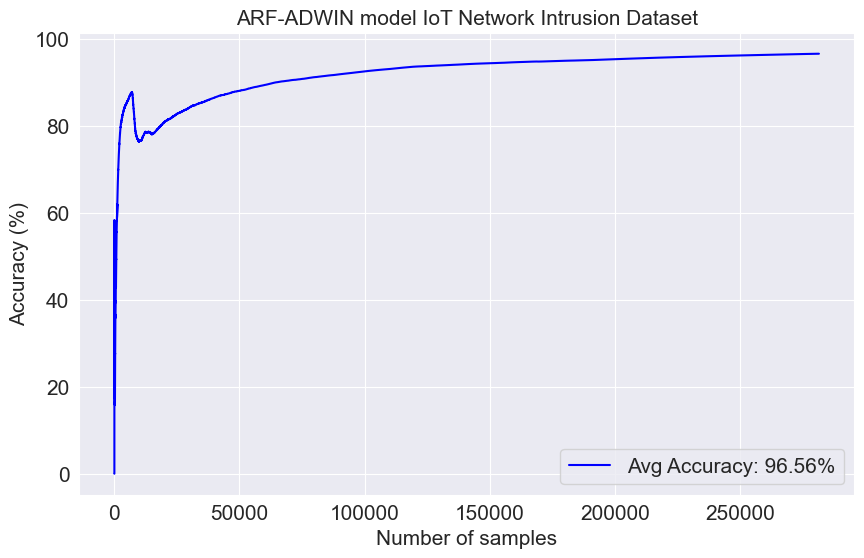

In [44]:
%%time
# Z-score normalization & random under-sampling
name1 = "ARF-ADWIN model"

model1 = imblearn.RandomUnderSampler( (
                                    preprocessing.StandardScaler() |
                                    ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = ADWIN())),
                                    desired_dist={0: 0.4, 1: 0.6}) 
                        # Ensure the ratio of the minority and the majority class samples is more than 2/3. 
                        # This rario can be changed according to specific situations.

t, m1 = adaptive_learning(model1, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m1, name1) # Draw the figure of how the real-time accuracy changes with the number of samples


Accuracy: 99.87%
Precision: 98.58%
Recall: 99.33999999999999%
F1-score: 98.96000000000001%
CPU times: total: 20min 9s
Wall time: 21min 50s


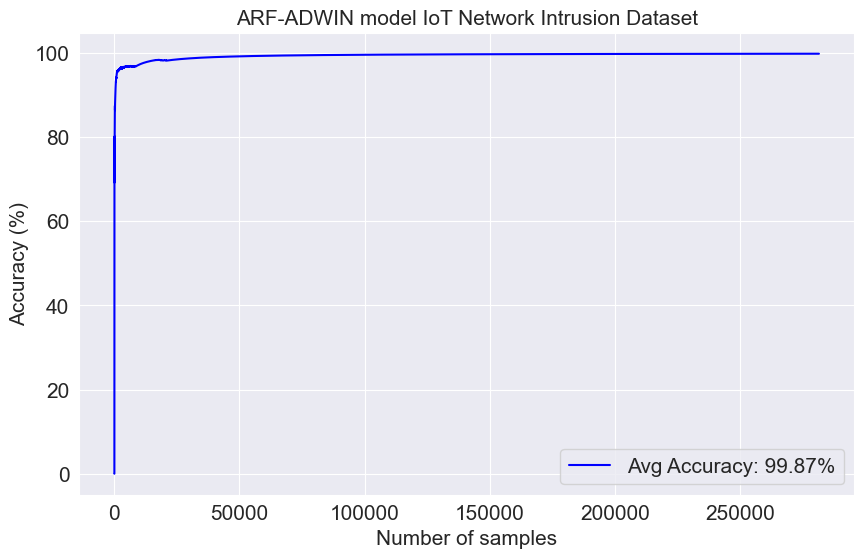

In [45]:
%%time
# Min-max normalization & random over-sampling
name1 = "ARF-ADWIN model"

model1 = imblearn.RandomOverSampler( (
                                    preprocessing.MinMaxScaler() |
                                    ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = ADWIN())),
                                    desired_dist={0: 0.4, 1: 0.6}) 
                        # Ensure the ratio of the minority and the majority class samples is more than 2/3. 
                        # This rario can be changed according to specific situations.

t, m1 = adaptive_learning(model1, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m1, name1) # Draw the figure of how the real-time accuracy changes with the number of samples


Accuracy: 99.77000000000001%
Precision: 97.48%
Recall: 98.99%
F1-score: 98.22999999999999%
CPU times: total: 15min 17s
Wall time: 20min 15s


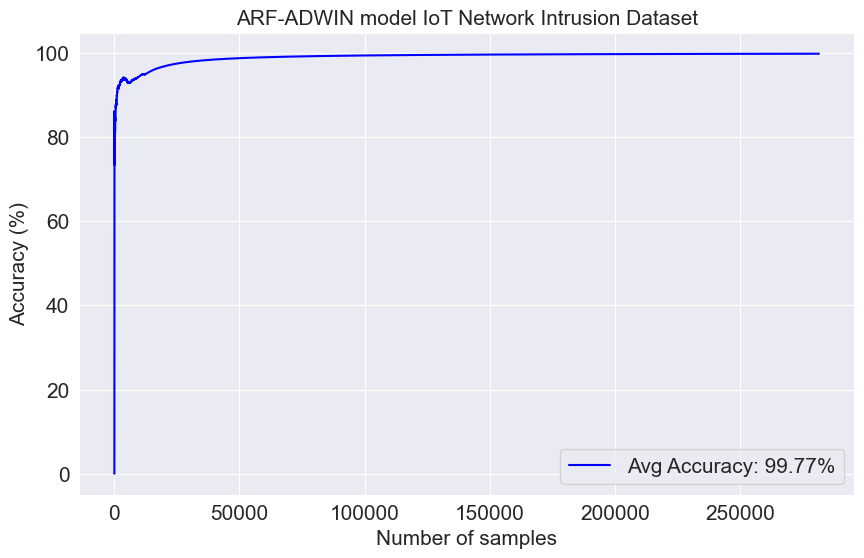

In [46]:
%%time
# Z-score normalization & random over-sampling
name1 = "ARF-ADWIN model"

model1 = imblearn.RandomOverSampler( (
                                    preprocessing.StandardScaler() |
                                    ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = ADWIN())),
                                    desired_dist={0: 0.4, 1: 0.6}) 
                        # Ensure the ratio of the minority and the majority class samples is more than 2/3. 
                        # This rario can be changed according to specific situations.

t, m1 = adaptive_learning(model1, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m1, name1) # Draw the figure of how the real-time accuracy changes with the number of samples


### 3. Model Learning
#### Base Model Learning for Comparison Purposes
##### State of the art online models:



CPU times: total: 0 ns
Wall time: 0 ns
Accuracy: 99.57000000000001%
Precision: 99.22999999999999%
Recall: 93.93%
F1-score: 96.50999999999999%


['ARF-ADWIN model.joblib']

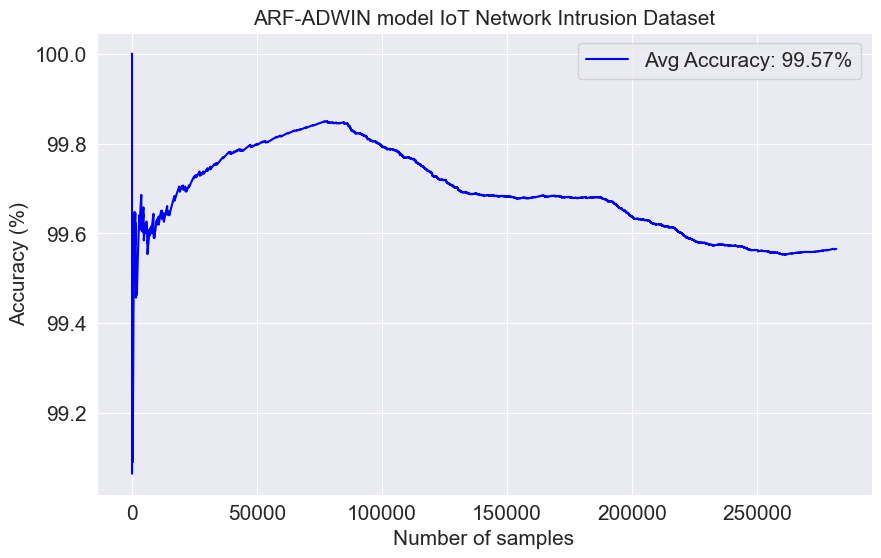

In [47]:
%time
# Use the Adaptive Random Forest (ARF) model with ADWIN drift detector
name1 = "ARF-ADWIN model"
model1 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = ADWIN()) # Define the model
t, m1 = adaptive_learning(model1, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m1, name1) # Draw the figure of how the real-time accuracy changes with the number of samples
joblib.dump(m1, f'{name1}.joblib')


Accuracy: 100.0%
Precision: 99.99%
Recall: 99.96000000000001%
F1-score: 99.97%
CPU times: total: 9min 31s
Wall time: 13min 19s


['ARF-EDDM model.joblib']

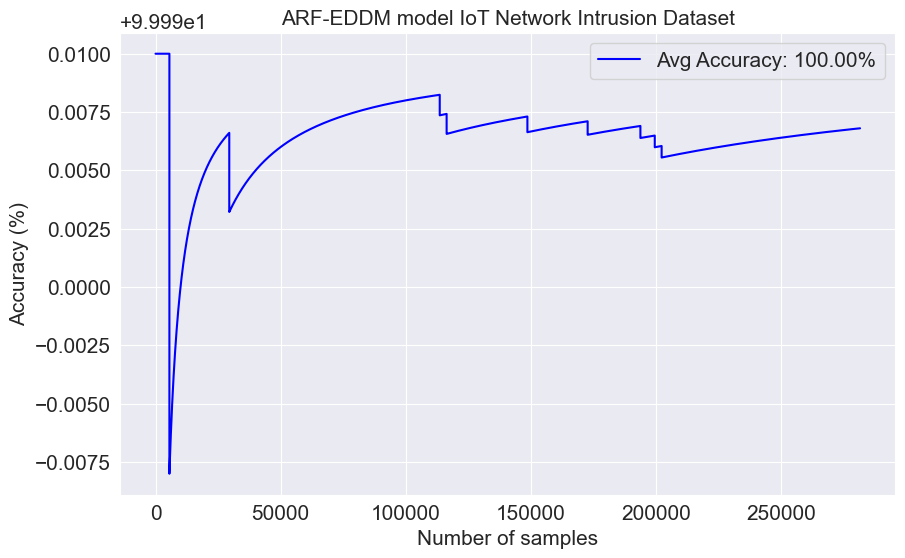

In [48]:
%%time
# Use the Adaptive Random Forest (ARF) model with EDDM drift detector
name2 = "ARF-EDDM model"
model2 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = EDDM()) # Define the model
t, m2 = adaptive_learning(model2, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m2, name2) # Draw the figure of how the real-time accuracy changes with the number of samples
joblib.dump(m2, f'{name2}.joblib')

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-score: 100.0%
CPU times: total: 1h 9min 21s
Wall time: 1h 22min 31s


['SRP model.joblib']

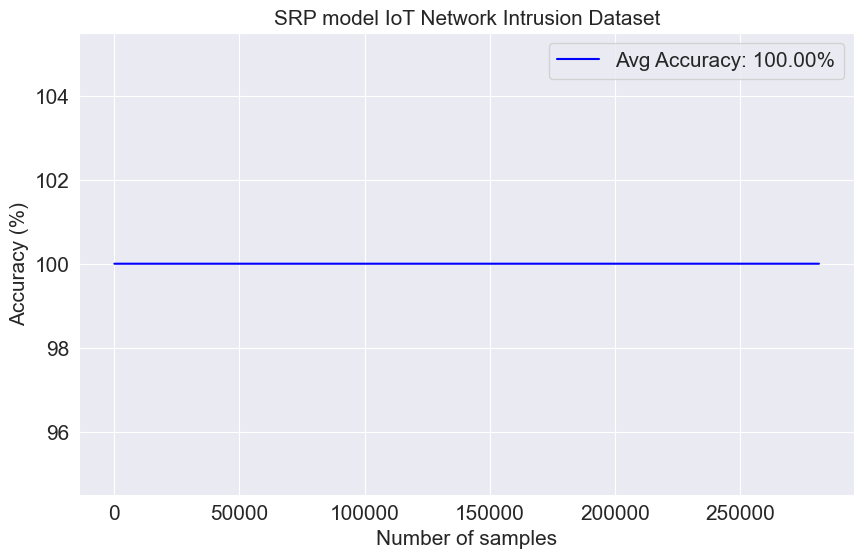

In [49]:
%%time
# Use the Streaming Random Patches (SRP) model
name3 = "SRP model"
model3 = ensemble.SRPClassifier(n_models = 3) # Define the model
t, m3 = adaptive_learning(model3, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m3, name3) # Draw the figure of how the real-time accuracy changes with the number of samples
joblib.dump(m3, f'{name3}.joblib')


Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-score: 100.0%
CPU times: total: 14min 9s
Wall time: 15min 26s


['EFDT model.joblib']

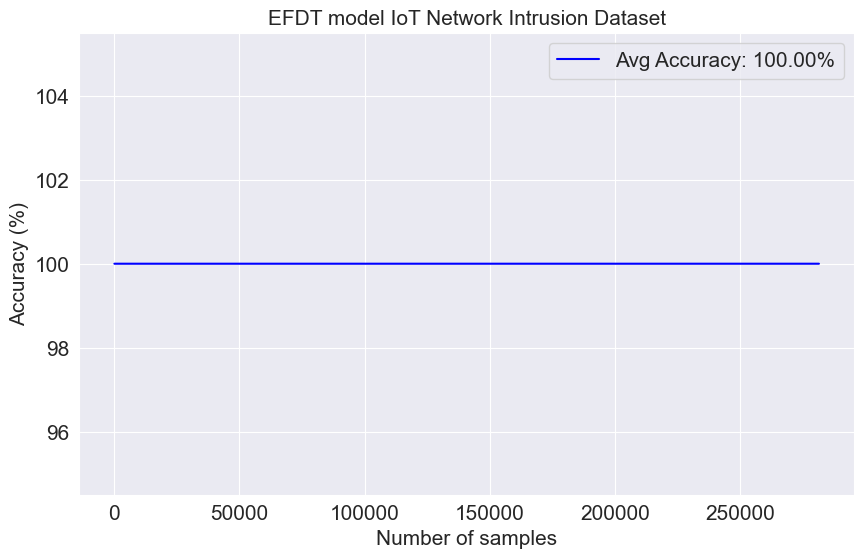

In [50]:
%%time
# Use the Extremely Fast Decision Tree (EFDT) model 
name4 = "EFDT model"
model4 = tree.ExtremelyFastDecisionTreeClassifier() # Define the model
t, m4 = adaptive_learning(model4, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m4, name4) # Draw the figure of how the real-time accuracy changes with the number of samples
joblib.dump(m4, f'{name4}.joblib')


In [51]:
# # Use the K-Nearest Neighbors (KNN) classifier with ADWIN change detector
# from river import neighbors
# name5 = "KNN-ADWIN model"
# model5 = neighbors.KNNADWINClassifier(window_size=100) # Define the model
# t, m5 = adaptive_learning(model5, X_train, y_train, X_test, y_test) # Learn the model on the dataset
# acc_fig(t, m5, name5) # Draw the figure of how the real-time accuracy changes with the number of samples
# # joblib.dump(m5, f'{name5}.joblib')


In [52]:
# %%time
# # Use the Self Adapting Memory (SAM) KNN model 
# name6 = "SAM-KNN model"
# model6 = neighbors.SAMKNNClassifier(window_size=100) # Define the model
# t, m6 = adaptive_learning(model6, X_train, y_train, X_test, y_test) # Learn the model on the dataset
# acc_fig(t, m6, name6) # Draw the figure of how the real-time accuracy changes with the number of samples
# joblib.dump(m6, f'{name6}.joblib')


Accuracy: 93.61%
Precision: 0.0%
Recall: 0.0%
F1-score: 0.0%
CPU times: total: 50.1 s
Wall time: 54 s


['OPA model.joblib']

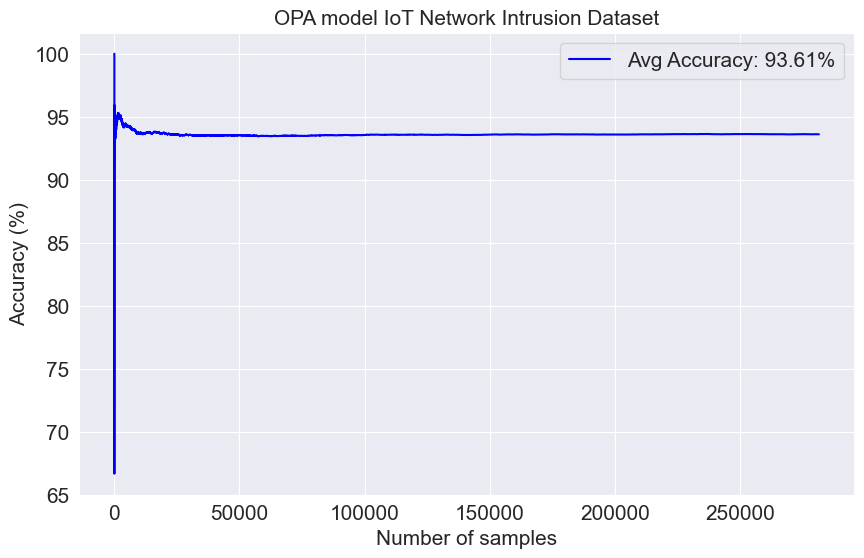

In [53]:
%%time
# Use the Online Passive-Aggressive (OPA) model
name7 = "OPA model"
model7 = linear_model.PAClassifier() # Define the model
t, m7 = adaptive_learning(model7, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m7, name7) # Draw the figure of how the real-time accuracy changes with the number of samples
joblib.dump(m7, f'{name7}.joblib')


In [54]:
%%time
# Use the Leveraging Bagging (LB) model 
name8 = "LB model"
model8 = ensemble.LeveragingBaggingClassifier(model=tree.HoeffdingTreeClassifier(),n_models=3) # Define the model
t, m8 = adaptive_learning(model8, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m8, name8) # Draw the figure of how the real-time accuracy changes with the number of samples
joblib.dump(m8, f'{name8}.joblib')


KeyboardInterrupt: 

In [ ]:
# Define the Performance Weighted Probability Averaging Ensemble (PWPAE) model
def PWPAE(X_train, y_train, X_test, y_test):
    # Record the real-time accuracy of PWPAE and 4 base learners
    metric = metrics.Accuracy()
    metric1 = metrics.Accuracy()
    metric2 = metrics.Accuracy()
    metric3 = metrics.Accuracy()
    metric4 = metrics.Accuracy()

    i=0
    t = []
    m = []
    m1 = []
    m2 = []
    m3 = []
    m4 = []
    yt = []
    yp = []

    hat1 = ensemble.AdaptiveRandomForestClassifier(n_models=3) # ARF-ADWIN
    hat2 = ensemble.SRPClassifier(n_models=2) # SRP-ADWIN
    hat3 = ensemble.AdaptiveRandomForestClassifier(n_models=3,drift_detector=DDM(),warning_detector=DDM()) # ARF-DDM
    hat4 = ensemble.SRPClassifier(n_models=2,drift_detector=DDM(),warning_detector=DDM()) # SRP-DDM

    selector1 = feature_selection.VarianceThreshold(threshold = 0.1)
    selector2 = feature_selection.SelectKBest(similarity=stats.PearsonCorr(),k=15)
    # Initial FS
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        selector1.learn_one(xi1) 
    
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        xi1 = selector1.transform_one(xi1)
        selector2.learn_one(xi1,yi1) 
        
    # Learn the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        xi1 = selector1.transform_one(xi1)
        xi1 = selector2.transform_one(xi1)
        hat1.learn_one(xi1,yi1)
        hat2.learn_one(xi1,yi1)
        hat3.learn_one(xi1,yi1)
        hat4.learn_one(xi1,yi1)

    # Predict the test set
    for xi, yi in stream.iter_pandas(X_test, y_test):
        # The four base learner predict the labels
        xi = selector1.transform_one(xi)
        xi = selector2.transform_one(xi)
        y_pred1= hat1.predict_one(xi) 
        y_prob1= hat1.predict_proba_one(xi) 
        hat1.learn_one(xi,yi)

        y_pred2= hat2.predict_one(xi) 
        y_prob2= hat2.predict_proba_one(xi)
        hat2.learn_one(xi,yi)

        y_pred3= hat3.predict_one(xi) 
        y_prob3= hat3.predict_proba_one(xi)
        hat3.learn_one(xi,yi)

        y_pred4= hat4.predict_one(xi) 
        y_prob4= hat4.predict_proba_one(xi)
        hat4.learn_one(xi,yi)
        
        # Record their real-time accuracy
        metric1 = metric1.update(yi, y_pred1)
        metric2 = metric2.update(yi, y_pred2)
        metric3 = metric3.update(yi, y_pred3)
        metric4 = metric4.update(yi, y_pred4)    

        # Calculate the real-time error rates of four base learners
        e1 = 1-metric1.get()
        e2 = 1-metric2.get()
        e3 = 1-metric3.get()
        e4 = 1-metric4.get()

        
        ep = 0.001 # The epsilon used to avoid dividing by 0
        # Calculate the weight of each base learner by the reciprocal of its real-time error rate
        ea = 1/(e1+ep)+1/(e2+ep)+1/(e3+ep)+1/(e4+ep)
        w1 = 1/(e1+ep)/ea
        w2 = 1/(e2+ep)/ea
        w3 = 1/(e3+ep)/ea
        w4 = 1/(e4+ep)/ea

        # Make ensemble predictions by the classification probabilities
        if  y_pred1 == 1:
            ypro10=1-y_prob1[1]
            ypro11=y_prob1[1]
        else:
            ypro10=y_prob1[0]
            ypro11=1-y_prob1[0]
        if  y_pred2 == 1:
            ypro20=1-y_prob2[1]
            ypro21=y_prob2[1]
        else:
            ypro20=y_prob2[0]
            ypro21=1-y_prob2[0]
        if  y_pred3 == 1:
            ypro30=1-y_prob3[1]
            ypro31=y_prob3[1]
        else:
            ypro30=y_prob3[0]
            ypro31=1-y_prob3[0]
        if  y_pred4 == 1:
            ypro40=1-y_prob4[1]
            ypro41=y_prob4[1]
        else:
            ypro40=y_prob4[0]
            ypro41=1-y_prob4[0]        

        # Calculate the final probabilities of classes 0 & 1 to make predictions
        y_prob_0 = w1*ypro10+w2*ypro20+w3*ypro30+w4*ypro40
        y_prob_1 = w1*ypro11+w2*ypro21+w3*ypro31+w4*ypro41

        if (y_prob_0>y_prob_1):
            y_pred = 0
            y_prob = y_prob_0
        else:
            y_pred = 1
            y_prob = y_prob_1
        
        # Update the real-time accuracy of the ensemble model
        metric = metric.update(yi, y_pred)

        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)
        
        i=i+1
    print("Accuracy: "+str(round(accuracy_score(yt,yp),4)*100)+"%")
    print("Precision: "+str(round(precision_score(yt,yp),4)*100)+"%")
    print("Recall: "+str(round(recall_score(yt,yp),4)*100)+"%")
    print("F1-score: "+str(round(f1_score(yt,yp),4)*100)+"%")
    return t, m

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1-score: 100.0%
CPU times: total: 48min 22s
Wall time: 49min 52s


['PWPAE model.joblib']

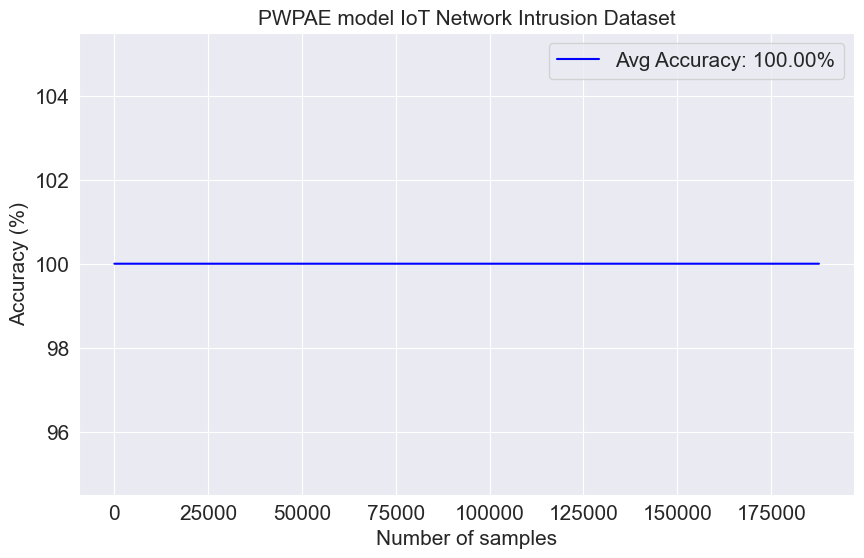

In [ ]:
%%time
# Use the Performance Weighted Probability Averaging Ensemble (PWPAE) model 
name9 = "PWPAE model"
t, m9 = PWPAE(X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m9, name9) # Draw the figure of how the real-time accuracy changes with the number of samples
joblib.dump(m9, f'{name9}.joblib')

### 4. Proposed Multi-Stage Automated Network Analytics (MSANA) Framework

In [ ]:
# Define the Window-based Performance Weighted Probability Averaging Ensemble (W-PWPAE) model
# An extension method of the PWPAE model
def MSANA(model1, model2, model3, model4, X_train, y_train, X_test, y_test):
    # Record the real-time accuracy of PWPAE and 4 base learners
    metric = metrics.Accuracy()
    metric1 = metrics.Accuracy()
    metric2 = metrics.Accuracy()
    metric3 = metrics.Accuracy()
    metric4 = metrics.Accuracy()
    
    metric_w1 = []
    metric_w2 = []
    metric_w3 = []
    metric_w4 = []


    i=0
    t = []
    m = []
    m1 = []
    m2 = []
    m3 = []
    m4 = []
    yt = []
    yp = []

    hat1 = model1
    hat2 = model2
    hat3 = model3
    hat4 = model4
    
    # Define the two feature selections methods: Variance Threshold and Select-K-Best
    selector1 = feature_selection.VarianceThreshold(threshold = 0.1)
    selector2 = feature_selection.SelectKBest(similarity=stats.PearsonCorr(),k=40)
    
    # Use EDDM to detect concept drift, it can be replaced with other drift detection methods like ADWIN, DDM, etc.
    eddm = EDDM()
    drift = 0

    # Initial feature selection on the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        selector1.learn_one(xi1) 
    
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        xi1 = selector1.transform_one(xi1)
        selector2.learn_one(xi1,yi1) 
        
    # Train the online models on the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        xi1 = selector1.transform_one(xi1)
        xi1 = selector2.transform_one(xi1)
        hat1.learn_one(xi1,yi1)
        hat2.learn_one(xi1,yi1)
        hat3.learn_one(xi1,yi1)
        hat4.learn_one(xi1,yi1)

    # Predict the test set
    for xi, yi in stream.iter_pandas(X_test, y_test):
        # The four base learners predict the labels
        xi = selector1.transform_one(xi)
        xi = selector2.transform_one(xi)
        y_pred1= hat1.predict_one(xi) 
        y_prob1= hat1.predict_proba_one(xi) 
        hat1.learn_one(xi,yi)

        y_pred2= hat2.predict_one(xi) 
        y_prob2= hat2.predict_proba_one(xi)
        hat2.learn_one(xi,yi)

        y_pred3= hat3.predict_one(xi) 
        y_prob3= hat3.predict_proba_one(xi)
        hat3.learn_one(xi,yi)

        y_pred4= hat4.predict_one(xi) 
        y_prob4= hat4.predict_proba_one(xi)
        hat4.learn_one(xi,yi)
        
        if y_pred1 == yi:
            metric_w1.append(0)
        else:
            metric_w1.append(1)
        if y_pred2 == yi:
            metric_w2.append(0)
        else:
            metric_w2.append(1)
        if y_pred3 == yi:
            metric_w3.append(0)
        else:
            metric_w3.append(1)
        if y_pred4 == yi:
            metric_w4.append(0)
        else:
            metric_w4.append(1)
        
        # Record their real-time accuracy
        metric1 = metric1.update(yi, y_pred1)
        metric2 = metric2.update(yi, y_pred2)
        metric3 = metric3.update(yi, y_pred3)
        metric4 = metric4.update(yi, y_pred4)    

        
        # Calculate the real-time window error rates of four base learners
        if i<1000:
            e1 = 0
            e2 = 0
            e3 = 0
            e4 = 0
        else:        
            e1 = sum(metric_w1[round(0.9*i):i])/len(metric_w1[round(0.9*i):i])
            e2 = sum(metric_w2[round(0.9*i):i])/len(metric_w1[round(0.9*i):i])
            e3 = sum(metric_w3[round(0.9*i):i])/len(metric_w1[round(0.9*i):i])
            e4 = sum(metric_w4[round(0.9*i):i])/len(metric_w1[round(0.9*i):i])

        
        ep = 0.001 # The epsilon used to avoid dividing by 0
        
        # Calculate the weight of each base learner by the reciprocal of its window real-time error rate
        ea = 1/(e1+ep)+1/(e2+ep)+1/(e3+ep)+1/(e4+ep)
        w1 = 1/(e1+ep)/ea
        w2 = 1/(e2+ep)/ea
        w3 = 1/(e3+ep)/ea
        w4 = 1/(e4+ep)/ea

        # Make ensemble predictions by the classification probabilities
        if  y_pred1 == 1:
            ypro10=1-y_prob1[1]
            ypro11=y_prob1[1]
        else:
            ypro10=y_prob1[0]
            ypro11=1-y_prob1[0]
        if  y_pred2 == 1:
            ypro20=1-y_prob2[1]
            ypro21=y_prob2[1]
        else:
            ypro20=y_prob2[0]
            ypro21=1-y_prob2[0]
        if  y_pred3 == 1:
            ypro30=1-y_prob3[1]
            ypro31=y_prob3[1]
        else:
            ypro30=y_prob3[0]
            ypro31=1-y_prob3[0]
        if  y_pred4 == 1:
            ypro40=1-y_prob4[1]
            ypro41=y_prob4[1]
        else:
            ypro40=y_prob4[0]
            ypro41=1-y_prob4[0]        

        # Calculate the final probabilities of classes 0 & 1 to make predictions
        y_prob_0 = w1*ypro10+w2*ypro20+w3*ypro30+w4*ypro40
        y_prob_1 = w1*ypro11+w2*ypro21+w3*ypro31+w4*ypro41
        
#         print(str(i)+" "+str(w1)+" "+str(w2)+" "+str(w3)+" "+str(w4)+" "+str(y_prob_0)+" "+str(y_prob_1))

        if (y_prob_0>y_prob_1):
            y_pred = 0
            y_prob = y_prob_0
        else:
            y_pred = 1
            y_prob = y_prob_1
        
        # Update the real-time accuracy of the ensemble model
        metric = metric.update(yi, y_pred)
        
        # # Detect concept drift
        # val = 0
        # if yi != y_pred:
        #     val = 1 
        # in_drift, in_warning = eddm.update(float(val))
        
        # if in_drift & (i>1000) :
        #     print(f"Change detected at index {i}")
        #     drift = 1 # indicating that a drift occurs
        
        # # If a drift is detected
        # if drift == 1: 
        #     x_new = X_test[round(0.9*i):i]
        #     y_new = y_test[round(0.9*i):i]
            
            # Relearn the online models on the most recent window data (representing new concept data)
            hat1 = ensemble.AdaptiveRandomForestClassifier(n_models=3) # ARF-ADWIN
            hat2 =ensemble.SRPClassifier(n_models = 3)  # SRP
            hat3 = ensemble.LeveragingBaggingClassifier(model=tree.HoeffdingTreeClassifier(),n_models=3) # LB CLASSIFIER
            hat4 = linear_model.PAClassifier() # SRP-DDM
            
            # Re-select features
            selector1 = feature_selection.VarianceThreshold(threshold = 0.1)
            selector2 = feature_selection.SelectKBest(similarity=stats.PearsonCorr(),k=40)
            
            for xj, yj in stream.iter_pandas(x_new, y_new):
                selector1 = selector1.learn_one(xj)
            for xj, yj in stream.iter_pandas(x_new, y_new):
                xj = selector1.transform_one(xj)
                selector2 = selector2.learn_one(xj, yj)      
            for xj, yj in stream.iter_pandas(x_new, y_new):
                xj = selector1.transform_one(xj)
                xa = selector2.transform_one(xj)
                hat1.learn_one(xa,yj)
                hat2.learn_one(xa,yj)
                hat3.learn_one(xa,yj)
                hat4.learn_one(xa,yj)
                
                if j ==1:
                    print(len(xa))
                    j=0
            drift = 0   
        
        j=1
        

        t.append(i)
        m.append(metric.get()*100)
        
        yt.append(yi)
        yp.append(y_pred)
        
        i=i+1
    
    # outputs
    print("Accuracy: "+str(round(accuracy_score(yt,yp),4)*100)+"%")
    print("Precision: "+str(round(precision_score(yt,yp),4)*100)+"%")
    print("Recall: "+str(round(recall_score(yt,yp),4)*100)+"%")
    print("F1-score: "+str(round(f1_score(yt,yp),4)*100)+"%")
    print(metric1.get()*100)
    print(metric2.get()*100)
    print(metric3.get()*100)
    print(metric4.get()*100)
    return t, m

In [ ]:
%%time
# Use the proposed Multi-Stage Automated Network Analytics (MSANA) model 

# Select the four base online models, they can be changed based on the performance of the models
bm1 = ensemble.AdaptiveRandomForestClassifier(n_models=3) # ARF-ADWIN
bm2 = ensemble.SRPClassifier(n_models = 3)  # SRP
bm3 = ensemble.LeveragingBaggingClassifier(model=tree.HoeffdingTreeClassifier(),n_models=3) # LB CLASSIFIER
bm4 = linear_model.PAClassifier() # OPA

name = "Proposed MSANA model"
t, m = MSANA(bm1, bm2, bm3, bm4, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples



TypeError: cannot unpack non-iterable EDDM object

In [ ]:
# Draw a comprehensive figure to compare the performance of all models
# https://matplotlib.org/stable/gallery/color/named_colors.html
plt.rcParams.update({'font.size': 30})
plt.figure(1,figsize=(24,16)) 
sns.set_style("darkgrid")
plt.clf() 

# Plot the accuracy change of each learner
# plt.plot(t,m,'-b',label=name+', Avg Accuracy: %.2f%%'%(m[-1]))
# plt.plot(t,m0,'pink',label=name0+', Avg Accuracy: %.2f%%'%(m0[-1]))
plt.plot(t,m1,'-r',label=name1+', Avg Accuracy: %.2f%%'%(m1[-1]))
plt.plot(t,m2,'-g',label=name2+', Avg Accuracy: %.2f%%'%(m2[-1]))
plt.plot(t,m3,'orange',label=name3+', Avg Accuracy: %.2f%%'%(m3[-1]))
plt.plot(t,m4,'black',label=name4+', Avg Accuracy: %.2f%%'%(m4[-1]))
# plt.plot(t,m5,'magenta',label=name5+', Avg Accuracy: %.2f%%'%(m5[-1]))
# plt.plot(t,m6,'grey',label=name6+', Avg Accuracy: %.2f%%'%(m6[-1]))
plt.plot(t,m7,'brown',label=name7+', Avg Accuracy: %.2f%%'%(m7[-1]))
plt.plot(t,m8,'pink',label=name8+', Avg Accuracy: %.2f%%'%(m8[-1]))
plt.plot(t,m9,'purple',label=name9+', Avg Accuracy: %.2f%%'%(m9[-1]))

# Draw the drift points/time
dr = [0,4950,6300, 7140,7900,9400,10800]
for i in range(len(dr)):
    if i!=0:
        plt.text(dr[i]-500, 100.1, 'Drift '+str(i), c = "red", fontsize = 25)
        plt.vlines(dr[i], 0, 100, colors = "red", linewidth=4, linestyles = "dashed")
        
plt.legend(loc='lower right')
plt.ylim(93, 100.5)
plt.title('CICIDS2017', fontsize=40)
plt.xlabel('Number of samples')
plt.ylabel('Accuracy (%)')
plt.save("result.jpg")
plt.draw()

NameError: name 'm' is not defined

<Figure size 2400x1600 with 0 Axes>

In [ ]:
%%time
# Example: combine the ensemble model with dynamic data balancing methods.

bm1 = imblearn.RandomOverSampler(ensemble.AdaptiveRandomForestClassifier(n_models=3),
                                 desired_dist={0: .4, 1: .6},
                                seed=42
                                ) # ARF-ADWIN
bm2 = imblearn.RandomOverSampler(ensemble.LeveragingBaggingClassifier(model=tree.HoeffdingTreeClassifier(),n_models=3),
                                 desired_dist={0: .4, 1: .6},
                                seed=42
                                ) # ARF-ADWIN
bm3 = imblearn.RandomOverSampler(ensemble.AdaptiveRandomForestClassifier(n_models=3,drift_detector=EDDM(),warning_detector=EDDM()), # ARF-EDDM,
                                 desired_dist={0: .4, 1: .6},
                                seed=42
                                ) # ARF-ADWIN
bm4 = imblearn.RandomOverSampler(linear_model.PAClassifier(), # SRP-DDM
                                 desired_dist={0: .4, 1: .6},
                                seed=42
                                ) # ARF-ADWIN

name = "Proposed MSANA model"
t, m = MSANA(bm1, bm2, bm3, bm4, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples


In [ ]:
# Draw a comprehensive figure to compare the performance of all models
# https://matplotlib.org/stable/gallery/color/named_colors.html
plt.rcParams.update({'font.size': 30})
plt.figure(1,figsize=(24,16)) 
sns.set_style("darkgrid")
plt.clf() 

# Plot the accuracy change of each learner
# plt.plot(t,m,'-b',label=name+', Avg Accuracy: %.2f%%'%(m[-1]))
# plt.plot(t,m0,'pink',label=name0+', Avg Accuracy: %.2f%%'%(m0[-1]))
plt.plot(t,m1,'-r',label=name1+', Avg Accuracy: %.2f%%'%(m1[-1]))
plt.plot(t,m2,'-g',label=name2+', Avg Accuracy: %.2f%%'%(m2[-1]))
plt.plot(t,m3,'orange',label=name3+', Avg Accuracy: %.2f%%'%(m3[-1]))
plt.plot(t,m4,'black',label=name4+', Avg Accuracy: %.2f%%'%(m4[-1]))
plt.plot(t,m5,'magenta',label=name5+', Avg Accuracy: %.2f%%'%(m5[-1]))
plt.plot(t,m6,'grey',label=name6+', Avg Accuracy: %.2f%%'%(m6[-1]))
plt.plot(t,m7,'brown',label=name7+', Avg Accuracy: %.2f%%'%(m7[-1]))
plt.plot(t,m8,'pink',label=name8+', Avg Accuracy: %.2f%%'%(m8[-1]))
plt.plot(t,m9,'purple',label=name9+', Avg Accuracy: %.2f%%'%(m9[-1]))

# Draw the drift points/time
dr = [0,4950,6300, 7140,7900,9400,10800]
for i in range(len(dr)):
    if i!=0:
        plt.text(dr[i]-500, 100.1, 'Drift '+str(i), c = "red", fontsize = 25)
        plt.vlines(dr[i], 0, 100, colors = "red", linewidth=4, linestyles = "dashed")
        
plt.legend(loc='lower right')
plt.ylim(93, 100.5)
plt.title('CICIDS2017', fontsize=40)
plt.xlabel('Number of samples')
plt.ylabel('Accuracy (%)')

plt.draw()
